<a href="https://colab.research.google.com/github/MWFK/TimeSeries_Sequence_with_TensorFlow/blob/main/5.%20TimeSeries_Sequences_Benchmarking_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credits

In [1]:
# Author: Mouafek Ayadi (but not the original code creator!)
# Contact: mouafek.ayadi@esprit.tn 
#          https://www.linkedin.com/in/mouafek-ayadi/
# Date: 2019/2020

# The source Code have been developed based on deeplearning.ai courses materials, tensorflow.org documentation and other open source resources. 
# that have been carefully documented in a separate document that you should find it alongside this notebook.
# The original code is under the Apache License, Version 2.0 (the "License");

# Librairies

In [2]:
import tensorflow as tf
print(tf.__version__)

import csv
import numpy as np
import matplotlib.pyplot as plt

2.5.0


# Visualization Function

In [3]:
def plot_series(time, series, title, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

# Download Dataset

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
    -O /tmp/sunspots.csv

--2021-08-09 16:31:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [application/octet-stream]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0.001s  

2021-08-09 16:31:44 (81.0 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]



# Import & Visualize Data

Row
['0', '1749-01-31', '96.7']
['1', '1749-02-28', '104.3']
['2', '1749-03-31', '116.7']
['3', '1749-04-30', '92.8']
['4', '1749-05-31', '141.7']
['5', '1749-06-30', '139.2']
['6', '1749-07-31', '158.0']
['7', '1749-08-31', '110.5']
['8', '1749-09-30', '126.5']
['9', '1749-10-31', '125.8']
['10', '1749-11-30', '264.3']
['11', '1749-12-31', '142.0']
['12', '1750-01-31', '122.2']
['13', '1750-02-28', '126.5']
['14', '1750-03-31', '148.7']
['15', '1750-04-30', '147.2']
['16', '1750-05-31', '150.0']
['17', '1750-06-30', '166.7']
['18', '1750-07-31', '142.3']
['19', '1750-08-31', '171.7']
['20', '1750-09-30', '152.0']
['21', '1750-10-31', '109.5']
['22', '1750-11-30', '105.5']
['23', '1750-12-31', '125.7']
['24', '1751-01-31', '116.7']
['25', '1751-02-28', '72.5']
['26', '1751-03-31', '75.5']
['27', '1751-04-30', '94.0']
['28', '1751-05-31', '101.2']
['29', '1751-06-30', '84.5']
['30', '1751-07-31', '110.5']
['31', '1751-08-31', '99.7']
['32', '1751-09-30', '39.2']
['33', '1751-10-31', '38

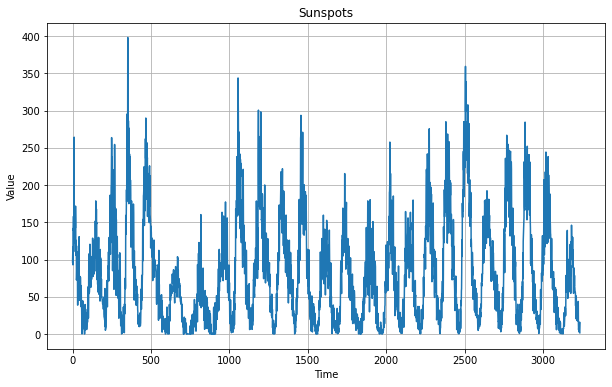

In [5]:
time_step = []
sunspots = []

with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  print('Row')
  for row in reader:
    print(row)
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

print('Sunspots\n', sunspots)
print('Time_Step\n', time_step)

# Convert to numpy array so it's works with tensorflow afterwards
series = np.array(sunspots)
time = np.array(time_step)
print('series\n', series)
print('time\n', time)

title = "Sunspots"
plt.figure(figsize=(10, 6))
plot_series(time, series, title)

print(series.shape)
print(time.shape)

# Split Data

In [6]:
split_time = 2500 # We have 10 years worth of data (3650) so the split time is more 75% 

time_train = time[:split_time] # 0..2500    => 2500
x_train    = series[:split_time] 
time_valid = time[split_time:] # 2501..3650 => 1150
x_valid    = series[split_time:]

window_size         = 30 
batch_size          = 32
shuffle_buffer_size = 1000

# Create a window

In [7]:
########################################################### [1]
# print(series)
# array([ 96.7, 104.3, 116.7, ...,  13.2,  15.9,   1.6])

# series = tf.expand_dims(series, axis=-1)
# print(series)
# array([[ 96.7],
#       [104.3],
#       [116.7],
#       ...,
#       [ 13.2],
#       [ 15.9],
#       [  1.6]])>


# tf.expand_dims(input, axis, name=None)
# image = tf.zeros([10,10,3])

# tf.expand_dims(image, axis=0).shape.as_list()
# [1, 10,10,3]

# tf.expand_dims(image, axis=1).shape.as_list()
# [10, 1,10,3]

# tf.expand_dims(image, axis=-1).shape.as_list()
# [10,10,3, 1]

In [8]:
# ########################################################### [2]
# dataset = tf.data.Dataset.from_tensor_slices([1,2,3])
# for element in dataset:
#   print(element)

In [9]:
# ############################################################ [3]

# # Initialize the series again
# sunspots = []
# with open('/tmp/sunspots.csv') as csvfile:
#   reader = csv.reader(csvfile, delimiter=',')
#   next(reader)
#   for row in reader:
#     sunspots.append(float(row[2]))
# series = np.array(sunspots)

# # Test the flat_map function
# # dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# # for element in dataset:
# #   print(element)

# # dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
# # list(dataset.as_numpy_iterator())

# import time
# series = tf.expand_dims(series, axis=-1)                      # [1] explanation above  
# ds = tf.data.Dataset.from_tensor_slices(series)               # [2] explanation above
# ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # window slide by one step each time
# ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # [3] each tensor will have this shape (31,1)
# for element in ds:
#   print(element)

In [10]:
# ############################################################ [4]

# # Initialize the series again
# sunspots = []
# with open('/tmp/sunspots.csv') as csvfile:
#   reader = csv.reader(csvfile, delimiter=',')
#   next(reader)
#   for row in reader:
#     sunspots.append(float(row[2]))
# series = np.array(sunspots)

# # Test the flat_map function
# # dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# # for element in dataset:
# #   print(element)

# # dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
# # list(dataset.as_numpy_iterator())

# import time
# series = tf.expand_dims(series, axis=-1)                      # [1] explanation above  
# ds = tf.data.Dataset.from_tensor_slices(series)               # [2] explanation above
# ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # window slide by one step each time
# ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # [3] each tensor will have this shape (31,1)

# # Explanation of he lambda function list
# #for w in ds:
#   #print(w[:-1]) # w[:-1] all elments except for the last one
#   #print(w[1:])  # w[1:]  all elements except the first one
#   #time.sleep(3)

# # without ds = ds.map(lambda w: (w[:-1], w[1:])) 
# # the first window will start by 96 and end with 110. shape(31,1) 
# # the second window will start by the value 104 and by the value 99 shape(31,1)
# # for element in ds:
# #   print(element)
# #   time.sleep(3)

# # with ds = ds.map(lambda w: (w[:-1], w[1:]))
# # the first window will start by 96 and end with 84. shape(30,1) 
# # the second window will start by the value 104 and by the value 110 shape(30,1)
# # therefore each time we're skiping the 31th value of each windowd
# ds = ds.map(lambda w: (w[:-1], w[1:])) 
# for element in ds:
#   print(element)
#   #time.sleep(3)

In [11]:
# ############################################################ [5]

# dataset = tf.data.Dataset.range(8)
# dataset = dataset.batch(3)
# print(list(dataset.as_numpy_iterator()))

# dataset = tf.data.Dataset.range(8)
# dataset = dataset.batch(3, drop_remainder=True)
# print(list(dataset.as_numpy_iterator()))

# Dataset creation
# ds = ds.batch(batch_size).prefetch(1)
# This returns a tf.data.Dataset object when a series is passed in along with the other arguments like window_size, batch_size, shuffle_buffer_size

# # Prefetch
# # ds = ds.batch(batch_size).prefetch(1)  print(ds) => shapes: ((None, None, 1), (None, None, 1))
# # print(list(ds.as_numpy_iterator())[0]) => two arrays
# # Creates a Dataset that prefetches elements from this dataset.
# # Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. 
# # This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

In [12]:
##################################################################################### Explanation of TF windowed dataset
# We're creating TF Windowed dataset, which have more methods than a regular dataset
# Represents a potentially large set of elements => tf.data.Dataset(variant_tensor)

def windowed_dataset(series, window_size, batch_size, shuffle_buffer): # [0] This returns a tf.data.Dataset object when a series is passed in along with the other arguments like window_size, batch_size, shuffle_buffer_size
                                                                       #     In this object each element is a batch of 32 windows and each window contains 30 values.
    
    series = tf.expand_dims(series, axis=-1)                           # [1] explanation above  
    ds = tf.data.Dataset.from_tensor_slices(series)                    # [2] explanation above
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)      #     Maps map_func across this dataset and flattens the result.
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))               # [3] explanation above
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))                             # [4] explanation above => splitting data into input and target

    return ds.batch(batch_size).prefetch(1)                            # [5] explanation above

# Forecast function

In [13]:
# We take the DNN model, and we try to apply it to our windowed series
# So after training it will help us forecast batches of our windowed series 
# we'll have 32 windowd with size of 30 in each batch, where each windowd will have one new value each time.
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    # No map or shuffle, this was done in the windowed_dataset()
    forecast = model.predict(ds)
    return forecast

# RNN Model

In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

# Simple RNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]), # since our dataset is windowed, then we'll construct one tensor, through pending each windowd to the end of the tensor
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_rnn = model.fit(train_set, epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
20/20 [==============================] - 4s 138ms/step - loss: 189.8737 - mae: 190.3731
Epoch 2/150
20/20 [==============================] - 3s 137ms/step - loss: 64.7048 - mae: 65.2030
Epoch 3/150
20/20 [==============================] - 3s 137ms/step - loss: 57.0828 - mae: 57.5810
Epoch 4/150
20/20 [==============================] - 3s 136ms/step - loss: 51.8561 - mae: 52.3540
Epoch 5/150
20/20 [==============================] - 3s 134ms/step - loss: 52.0089 - mae: 52.5070
Epoch 6/150
20/20 [==============================] - 3s 137ms/step - loss: 52.1802 - mae: 52.6783
Epoch 7/150
20/20 [==============================] - 3s 142ms/step - loss: 51.7754 - mae: 52.2735
Epoch 8/150
20/20 [==============================] - 3s 143ms/step - loss: 50.4516 - mae: 50.9494
Epoch 9/150
20/20 [==============================] - 3s 143ms/step - loss: 55.3386 - mae: 55.8367
Epoch 10/150
20/20 [==============================] - 3s 135ms/step - loss: 50.3595 - mae: 50.8573
Epoch 11/150
20/2

# RNN MAE and Loss

<Figure size 432x288 with 0 Axes>

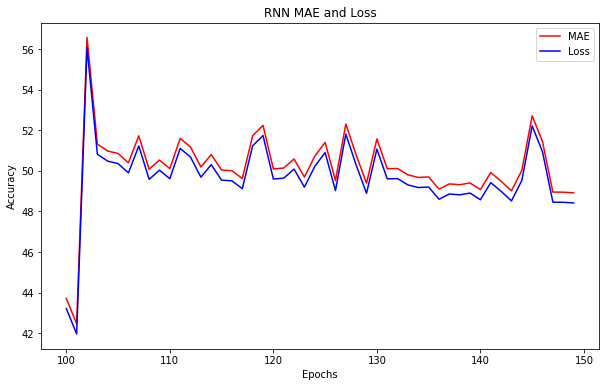

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_rnn.history['mae']
loss=history_rnn.history['loss']

epochs=range(len(loss)) # Get number of epochs


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('RNN MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# LSTM Model

In [20]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([

  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  #tf.keras.layers.Lambda(lambda x: x * 400)
])

# We have inferred from the previouss cell that the preferred Learning rate is 1e-5
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_lstm = model.fit(train_set,epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
25/25 [==============================] - 5s 33ms/step - loss: 77.6895 - mae: 78.1772
Epoch 2/150
25/25 [==============================] - 1s 33ms/step - loss: 77.6757 - mae: 78.1632
Epoch 3/150
25/25 [==============================] - 1s 34ms/step - loss: 77.6600 - mae: 78.1473
Epoch 4/150
25/25 [==============================] - 1s 34ms/step - loss: 77.6441 - mae: 78.1311
Epoch 5/150
25/25 [==============================] - 1s 35ms/step - loss: 77.6282 - mae: 78.1149
Epoch 6/150
25/25 [==============================] - 1s 34ms/step - loss: 77.6125 - mae: 78.0990
Epoch 7/150
25/25 [==============================] - 1s 34ms/step - loss: 77.5970 - mae: 78.0832
Epoch 8/150
25/25 [==============================] - 1s 34ms/step - loss: 77.5816 - mae: 78.0676
Epoch 9/150
25/25 [==============================] - 1s 33ms/step - loss: 77.5668 - mae: 78.0526
Epoch 10/150
25/25 [==============================] - 1s 34ms/step - loss: 77.5537 - mae: 78.0393
Epoch 11/150
25/25 [=========

# LSTM MAE and Loss

<Figure size 432x288 with 0 Axes>

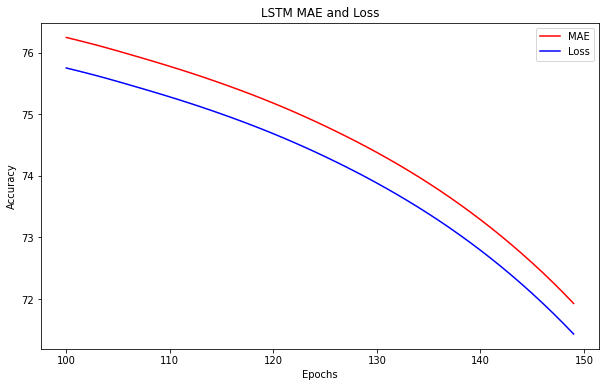

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_lstm.history['mae']
loss=history_lstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('LSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# BLSTM Model

In [22]:
# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
# A common use-case for clear_session is releasing memory when building models and layers in a loop.
# Clears any internal variables, which means models will not impact later versions of themselves
tf.keras.backend.clear_session()

# This sets the graph-level seed.
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/random/set_seed
tf.random.set_seed(51)

# I's for operation level
np.random.seed(51)

# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
# A common use-case for clear_session is releasing memory when building models and layers in a loop.
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Windowed BI-LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x),# Given a tensor input, this operation inserts a dimension of size 1 at the dimension index axis of input's shape. # https://www.tensorflow.org/api_docs/python/tf/expand_dims
                                                     input_shape=[None])),     # This means that the model can take sequences of any length
  # The windowed_dataset() return two dimensional batches, with the first being the batch size and the second being the number of timesteps 
  # But the RNN expects three dimensions, so the lambda layer, help fix the difference in dimensions, by adding expannding the array by one dimension

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),

  # input a sequence and don't output it, except for the last one (sequence to vector RNN), which is the default behavior of Keras TF, 
  # otherwise we set the return_sequence=False and we we'll have (sequence to sequence)

  # The output of the layer is three dimensionals [batch_size * number_units(nulber of units in a cell) * overall_steps(number of cells)]

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0) #400.0

  # For example the activation function of the RNN use tanH function which have values between -1 and 1, 
  # so we multipky the output by 100, so we can have the regular values of our input time series.
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), # Less sensitive to outliers
              optimizer=optimizer,
              metrics=["mae"])
history_blstm = model.fit(dataset, epochs=150)

SyntaxError: ignored

# BLSTM MAE & Loss

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_blstm.history['mae']
loss=history_blstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('BLSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# CNN LSTM Model

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size) # We take a window of x_train
print("train_set= ",train_set)
print("\n x_train.shape= ",x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]), # We have specified the input shape here so we need to change the windowed_dataset() => it works but foes not give the same result
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_lstm = model.fit(train_set, epochs=150)


train_set=  <PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

 x_train.shape=  (2500,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
10/10 [==============================] - 4s 42ms/step - loss: 46.9033 - mae: 47.4005
Epoch 2/150
10/10 [==============================] - 1s 50ms/step - loss: 29.1837 - mae: 29.6789
Epoch 3/150
10/10 [==============================] - 1s 53ms/step - loss: 25.4633 - mae: 25.9581
Epoch 4/150
10/10 [==============================] - 1s 55ms/step - loss: 23.5775 - mae: 24.0716
Epoch 5/150
10/10 [==============================] - 1s 53ms/step - loss: 22.0672 - mae: 22.5607
Epoch 6/150
10/10 [==============================] - 1s 54ms/step - loss: 21.3314 - mae: 21.8244
Epoch 7/150
10/10 [==============================] - 1s 52ms/step - loss: 20.7313 - mae: 21.2242
Epoch 8/150
10/10 [==============================] - 1s 51ms/step - loss: 20.2809 - mae: 20.7735
Epoch 9/150
10/10 [==============================] - 1s 54ms/step - loss: 19.9463 - mae: 20.4390
Epoch 10/150
10/10 [==============================] - 1s 52ms/step - loss: 19.7941 - mae: 20.2869
Epoch 11/150
10/10 [=========

# CNN LSTM MAE & Loss

<Figure size 432x288 with 0 Axes>

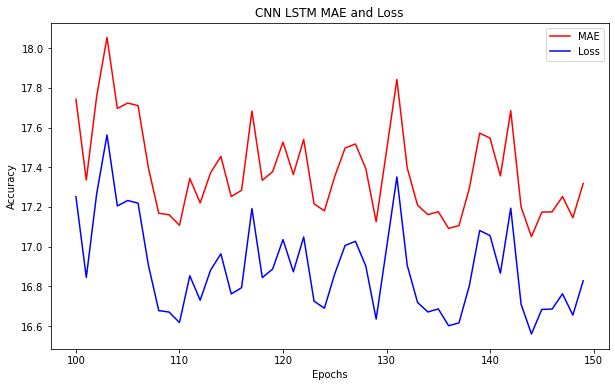

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_cnn_lstm.history['mae']
loss=history_cnn_lstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN LSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# CNN BLSTM Model

In [23]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Windowed CNN BLSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),    
  
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),



  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),

  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), 
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_blstm = model.fit(dataset, epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
10/10 [==============================] - 10s 114ms/step - loss: 50.5476 - mae: 51.0455
Epoch 2/150
10/10 [==============================] - 1s 113ms/step - loss: 38.3857 - mae: 38.8825
Epoch 3/150
10/10 [==============================] - 1s 116ms/step - loss: 30.3456 - mae: 30.8413
Epoch 4/150
10/10 [==============================] - 1s 111ms/step - loss: 25.8488 - mae: 26.3431
Epoch 5/150
10/10 [==============================] - 1s 112ms/step - loss: 23.7558 - mae: 24.2501
Epoch 6/150
10/10 [==============================] - 1s 112ms/step - loss: 22.4358 - mae: 22.9293
Epoch 7/150
10/10 [==============================] - 1s 112ms/step - loss: 21.5137 - mae: 22.0070
Epoch 8/150
10/10 [==============================] - 1s 113ms/step - loss: 20.8320 - mae: 21.3248
Epoch 9/150
10/10 [==============================] - 1s 114ms/step - loss: 20.3815 - mae: 20.8742
Epoch 10/150
10/10 [==============================] - 1s 114ms/step - loss: 20.0725 - mae: 20.5653
Epoch 11/150
10/10

# CNN BLSTM MAE and Loss

<Figure size 432x288 with 0 Axes>

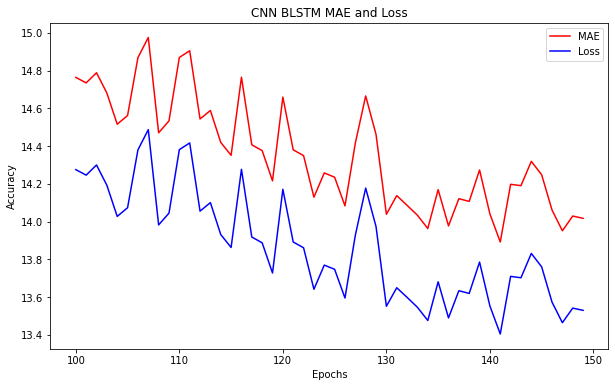

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_cnn_blstm.history['mae']
loss=history_cnn_blstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN BLSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()